<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            IMPORTING REQUIRED LIBRARIES
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            LOADING DATA
</p>
</div>

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Aabhasi/TestX/main/RTA%20Dataset.csv")

In [3]:
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
           EXPLORATORY ANALYSIS
</p>
</div>

In [5]:
data.describe().T

count      mean       std  min  25%  50%  75%  \
Number_of_vehicles_involved  12316.0  2.040679  0.688790  1.0  2.0  2.0  2.0   
Number_of_casualties         12316.0  1.548149  1.007179  1.0  1.0  1.0  2.0   

                             max  
Number_of_vehicles_involved  7.0  
Number_of_casualties         8.0

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
           SKEWNESS OF THE DATA
</p>
</div>

In [6]:
numeric_columns = data.select_dtypes(include=['number']).columns
skew = data[numeric_columns].skew()

print(skew)

Number_of_vehicles_involved    1.323454
Number_of_casualties           2.344769
dtype: float64


<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            CORRELATION
</p>
</div>

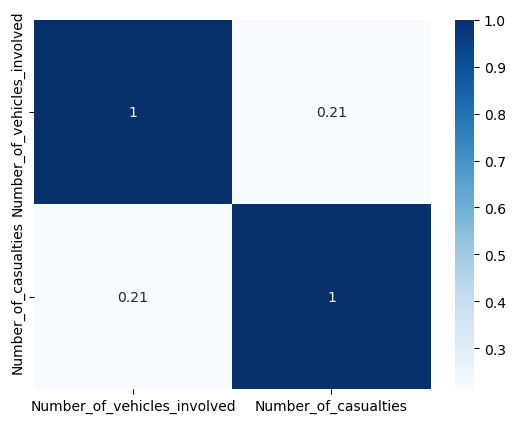

In [7]:
correlation = data[numeric_columns].corr()

sns.heatmap(correlation, annot=True, cmap='Blues')

plt.show()

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            WHO GOT MORE ACCIDENTS? MALE OR FEMALE ..
</p>
</div>

In [8]:
px.pie(data, data['Sex_of_driver'], data['Number_of_casualties'], template='ggplot2',hole=0.5)

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
   WHAT SURFACE OF ROADS CAN CAUSE MORE ACCIDENTS ?
</p>
</div>

In [9]:
px.violin(data,data['Road_surface_type'], data['Number_of_casualties'],color='Accident_severity',template='ggplot2')

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            WHAT INJURIES MAJORLY OCCURS IN AN ACCIDENT
</p>
</div>

In [10]:
px.pie(data,data['Accident_severity'],data['Number_of_casualties'],color='Accident_severity',template='ggplot2',hole=0.5)

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            CAUSE OF AN ACCIDENT
</p>
</div>

In [11]:
px.pie(data,data['Cause_of_accident'],data['Number_of_casualties'],color='Cause_of_accident',template='ggplot2',hole=0.35)

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            ON WHICH DAY MORE NO. OF ACCIDENTS OCCURED
</p>
</div>

In [12]:
px.histogram(data,data['Day_of_week'],data['Number_of_casualties'],color='Day_of_week',template='ggplot2')

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            ARE HIGH SCHOOL STUDENTS GETTING MORE ACCIDENTS ?
</p>
</div>

In [13]:
px.histogram(data,data['Educational_level'],data['Number_of_casualties'],color='Educational_level',template='ggplot2')

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            ARE EMPLOYEES GETTING MORE INTO ACCIDENTS ?
</p>
</div>

In [14]:
px.histogram(data,data['Vehicle_driver_relation'],data['Number_of_casualties'],color='Vehicle_driver_relation',template='ggplot2')

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            PREPROCESSING 
</p>
</div>

In [15]:
df=data.copy(deep=True)
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [16]:
column_names = df.columns.tolist()

print(column_names)

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
           TREATING WITH NULL VALUES
</p>
</div>

In [17]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [18]:
df.shape

(12316, 32)

In [19]:
df.size

394112

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            REMOVING UNWANTED FEATURES 
</p>
</div>

In [20]:
df.drop(['Time','Driving_experience','Type_of_vehicle','Educational_level'],axis=1,inplace=True)

In [21]:
df.drop(['Vehicle_driver_relation','Lanes_or_Medians','Owner_of_vehicle','Area_accident_occured','Road_allignment',
         'Types_of_Junction','Light_conditions','Weather_conditions','Vehicle_movement','Fitness_of_casuality',
        'Vehicle_movement','Age_band_of_driver','Sex_of_driver'],axis=1,inplace=True)
df.drop(['Pedestrian_movement','Cause_of_accident','Work_of_casuality','Road_surface_conditions'],axis=1,inplace=True)
df.drop(['Service_year_of_vehicle','Defect_of_vehicle'],axis=1,inplace=True)

In [22]:
df.dropna(inplace=True)

In [23]:
for i in df.columns:
    if df[i].dtypes== object:
        print(i)
        print(df[i].unique())
        print(df[i].nunique())
        print()

Day_of_week
['Monday' 'Sunday' 'Friday' 'Saturday' 'Thursday' 'Tuesday' 'Wednesday']
7

Road_surface_type
['Asphalt roads' 'Earth roads' 'Asphalt roads with some distress'
 'Gravel roads' 'Other']
5

Type_of_collision
['Collision with roadside-parked vehicles'
 'Vehicle with vehicle collision' 'Collision with roadside objects'
 'Collision with animals' 'Other' 'Rollover' 'Fall from vehicles'
 'Collision with pedestrians' 'With Train' 'Unknown']
10

Casualty_class
['na' 'Driver or rider' 'Pedestrian' 'Passenger']
4

Sex_of_casualty
['na' 'Male' 'Female']
3

Age_band_of_casualty
['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
6

Casualty_severity
['na' '3' '2' '1']
4

Accident_severity
['Slight Injury' 'Serious Injury' 'Fatal injury']
3



In [24]:
df.head()

Day_of_week Road_surface_type                        Type_of_collision  \
0      Monday     Asphalt roads  Collision with roadside-parked vehicles   
1      Monday     Asphalt roads           Vehicle with vehicle collision   
2      Monday     Asphalt roads          Collision with roadside objects   
3      Sunday       Earth roads           Vehicle with vehicle collision   
4      Sunday     Asphalt roads           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties   Casualty_class  \
0                            2                     2               na   
1                            2                     2               na   
2                            2                     2  Driver or rider   
3                            2                     2       Pedestrian   
4                            2                     2               na   

  Sex_of_casualty Age_band_of_casualty Casualty_severity Accident_severity  
0              na                   na                na     Slight Injury  
1              na                   na                na     Slight Injury  
2            Male                31-50                 3    Serious Injury  
3          Female                18-30                 3     Slight Injury  
4              na                   na                na     Slight Injury

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            LABEL ENCODING
</p>
</div>

In [25]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        df[col] = l.fit_transform(df[col])

In [26]:
df.head()

Day_of_week  Road_surface_type  Type_of_collision  \
0            1                  0                  3   
1            1                  0                  8   
2            1                  0                  2   
3            3                  2                  8   
4            3                  0                  8   

   Number_of_vehicles_involved  Number_of_casualties  Casualty_class  \
0                            2                     2               3   
1                            2                     2               3   
2                            2                     2               0   
3                            2                     2               2   
4                            2                     2               3   

   Sex_of_casualty  Age_band_of_casualty  Casualty_severity  Accident_severity  
0                2                     5                  3                  2  
1                2                     5                  3                  2  
2                1                     1                  2                  1  
3                0                     0                  2                  2  
4                2                     5                  3                  2

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            MODEL BUILDING & ACCURACY COMPARISON   
</p>
</div>

In [27]:
df_Accuracy = pd.DataFrame(columns=['Classifier','30', '28', '26', '24', '22', '20', '18', '16'])

x=df.drop('Accident_severity',axis=1)
y=df['Accident_severity']
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

parts = [0.30, 0.28, 0.26, 0.24, 0.22, 0.20, 0.18, 0.16]
classifierList = ['RandomForest', 'KNN', 'Bayes', 'DT']

for classifier in classifierList:
    xtemp = len(df_Accuracy)
    df_Accuracy.loc[xtemp] = [0] * len(df_Accuracy.columns)
    df_Accuracy['Classifier'][xtemp] = classifier

for p in parts:
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size= p)
    from sklearn.preprocessing import MinMaxScaler
    mms=MinMaxScaler(feature_range=(0,1))
    xtrain=mms.fit_transform(xtrain)
    xtest=mms.fit_transform(xtest)
    xtrain=pd.DataFrame(xtrain)
    xtest=pd.DataFrame(xtest)
    
    for classifier in classifierList:
        
        if(classifier == "RandomForest"):
            model = RandomForestClassifier()
        elif(classifier == "KNN"):
            model = KNeighborsClassifier()
        elif(classifier == "Bayes"):
            model = GaussianNB()
        elif(classifier == "DT"):
            model = DecisionTreeClassifier(random_state=0)
        else:
            continue


        model.fit(xtrain, ytrain)
        ypred=model.predict(xtest)
        df_Accuracy[str(int(p*100))][classifierList.index(classifier)] = round(accuracy_score(ytest,ypred),4)

        print('----------------------Start------------------------------------')
        print(classifier + "----"+ str(p))
        
        print('accuracy :',round(accuracy_score(ytest,ypred),2))
        print('----------------------End------------------------------------')



----------------------Start------------------------------------
RandomForest----0.3
accuracy : 0.83
----------------------End------------------------------------
----------------------Start------------------------------------
KNN----0.3
accuracy : 0.82
----------------------End------------------------------------
----------------------Start------------------------------------
Bayes----0.3
accuracy : 0.84
----------------------End------------------------------------
----------------------Start------------------------------------
DT----0.3
accuracy : 0.8
----------------------End------------------------------------
----------------------Start------------------------------------
RandomForest----0.28
accuracy : 0.83
----------------------End------------------------------------
----------------------Start------------------------------------
KNN----0.28
accuracy : 0.83
----------------------End------------------------------------
----------------------Start-----------------------------------

In [28]:
df_Accuracy.set_index('Classifier', inplace=True)
df_Accuracy

30      28      26      24      22      20      18      16
Classifier                                                                  
RandomForest  0.8299  0.8276  0.8159  0.8319  0.8276  0.8366  0.8393  0.8343
KNN           0.8241  0.8276  0.8137  0.8288  0.8261  0.8328  0.8231  0.8317
Bayes         0.8385  0.8177  0.8130  0.8274  0.8177  0.8249  0.8286  0.8458
DT            0.7996  0.8049  0.7806  0.8034  0.7950  0.8137  0.8041  0.8166

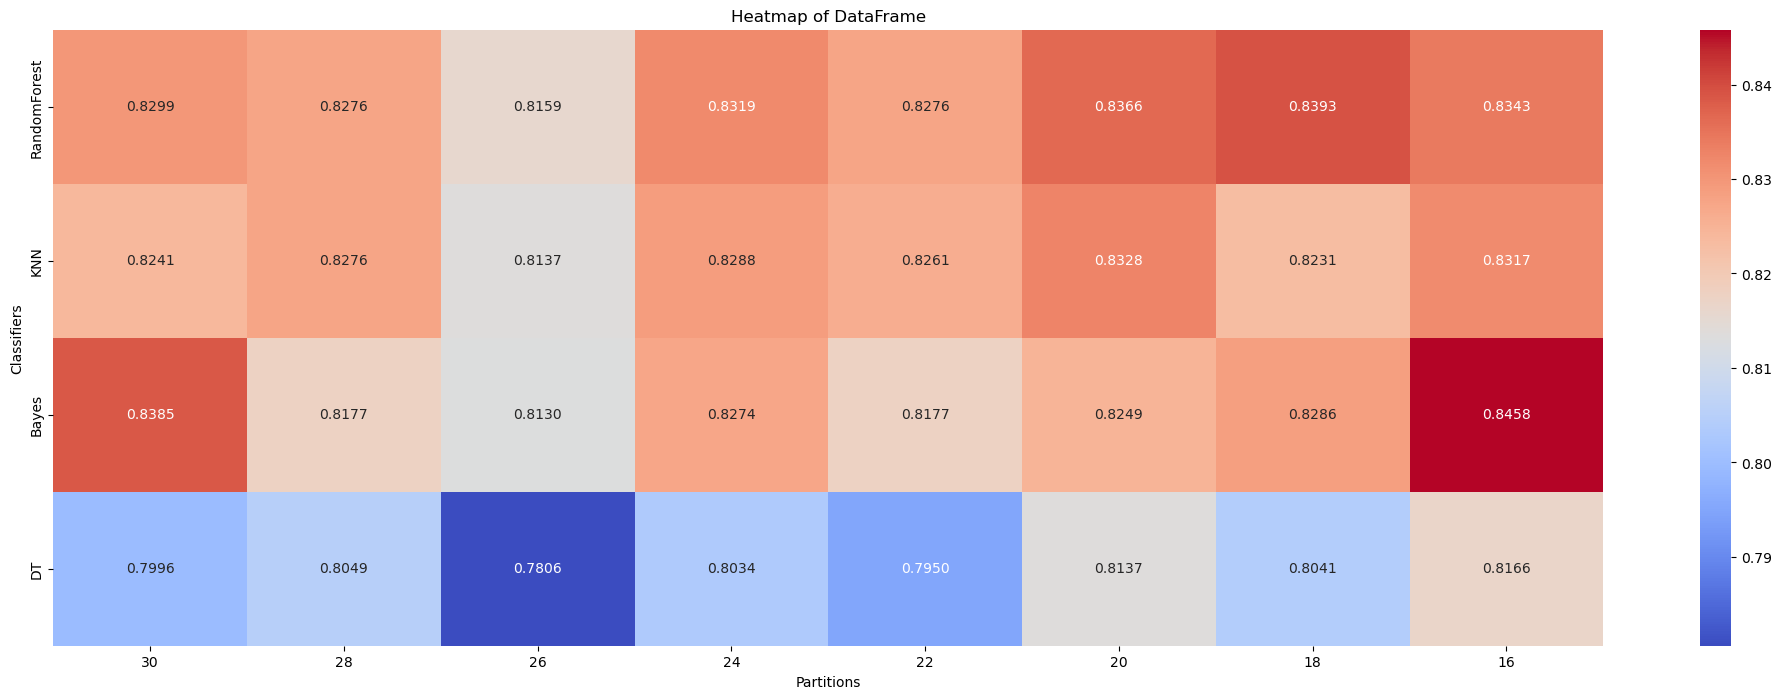

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 8))  
hmap = sns.heatmap(df_Accuracy, annot=True, cmap='coolwarm', fmt=".4f")  

plt.title('Heatmap of DataFrame')
plt.xlabel('Partitions')
plt.ylabel('Classifiers')
plt.show()

Cross-validation scores: [0.79833333 0.78       0.78982485 0.78732277 0.80483736 0.7881568
 0.80066722 0.80066722 0.80900751 0.7764804 ]
Mean CV Accuracy: 0.7935297470113983
--Mean CV Accuracy for k=1: 0.7573366856707392
--Mean CV Accuracy for k=2: 0.6728646318785176
--Mean CV Accuracy for k=3: 0.8091230325674342
--Mean CV Accuracy for k=4: 0.7843571532620104
--Mean CV Accuracy for k=5: 0.8303041543929377
--Mean CV Accuracy for k=6: 0.824550123574564
--Mean CV Accuracy for k=7: 0.8401433249397424
--Mean CV Accuracy for k=8: 0.8354740177047637
--Mean CV Accuracy for k=9: 0.843812806350714
--Mean CV Accuracy for k=10: 0.8403102696738042


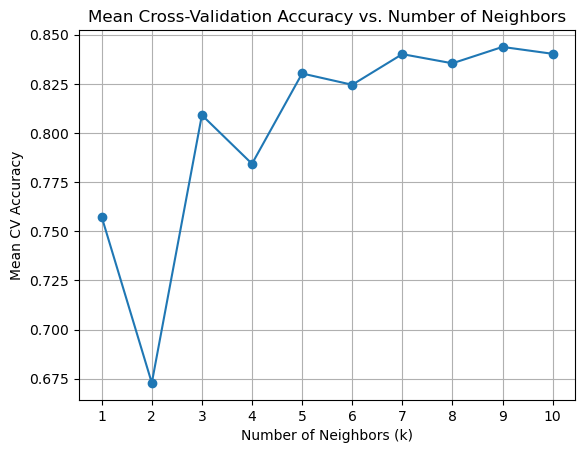

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(model, x, y, cv=10)  
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


neighbors = range(1, 11)
mean_cv_accuracies = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, x, y, cv=5)
    mean_cv_accuracies.append(np.mean(cv_scores))
    print(f"--Mean CV Accuracy for k={k}: {np.mean(cv_scores)}")

plt.plot(neighbors, mean_cv_accuracies, marker='o')
plt.title('Mean Cross-Validation Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            FEATURE SELECTION - KNN
</p>
</div>

In [31]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

X=df.drop('Accident_severity',axis=1)
y=df['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
accuracy = accuracy_score(y_test, knn.predict(X_test))
print("Accuracy before feature selection:", accuracy)
print("Old Features:", df.columns)

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features_indices = selector.get_support(indices=True)
selected_features_names = X.columns[selected_features_indices]
X_selected = X[selected_features_names]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn.fit(X_train_sel, y_train_sel)
accuracy_sel = accuracy_score(y_test_sel, knn.predict(X_test_sel))
print("Accuracy after feature selection:", accuracy_sel)
print("Selected Features:", selected_features_names)

X_test shape: (2399, 9)
y_test shape: (2399,)
Accuracy before feature selection: 0.8320133388912047
Old Features: Index(['Day_of_week', 'Road_surface_type', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Accident_severity'],
      dtype='object')
Accuracy after feature selection: 0.8165902459358065
Selected Features: Index(['Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Casualty_class', 'Age_band_of_casualty'],
      dtype='object')


In [32]:
column_names = df.columns.tolist()

print(column_names)


['Day_of_week', 'Road_surface_type', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Accident_severity']
